<a href="https://colab.research.google.com/github/oneoclockc/deeplearning-for-AI/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [47]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [48]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [49]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [50]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [51]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [52]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [53]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5450 - accuracy: 0.7635 - val_loss: 0.4060 - val_accuracy: 0.8740
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3267 - accuracy: 0.9007 - val_loss: 0.3347 - val_accuracy: 0.8743
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2387 - accuracy: 0.9230 - val_loss: 0.2902 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1885 - accuracy: 0.9397 - val_loss: 0.2712 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1530 - accuracy: 0.9509 - val_loss: 0.2867 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1264 - accuracy: 0.9611 - val_loss: 0.2939 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1066 - accuracy: 0.9682 - val_loss: 0.3221 - val_accuracy: 0.8806
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [8]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [16]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [17]:
# 타겟 y를 one hot encoding
def to_one_hot(labels, dimension=2):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
#model2.compile()
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#model2.fit()
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0137 - accuracy: 0.9961 - val_loss: 0.8171 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.8463 - val_accuracy: 0.8632
Epoch 3/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.8935 - val_accuracy: 0.8628
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 7.3475e-04 - accuracy: 1.0000 - val_loss: 0.9112 - val_accuracy: 0.8618
Epoch 5/20
30/30 [==============================] - 1s 50ms/step - loss: 5.8674e-04 - accuracy: 1.0000 - val_loss: 0.9516 - val_accuracy: 0.8600
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0100 - accuracy: 0.9975 - val_loss: 1.0051 - val_accuracy: 0.8602
Epoch 7/20
30/30 [==============================] - 2s 59ms/step - loss: 3.0527e-04 - accuracy: 1.0000 - val_loss: 1.0159 - val_accuracy: 0.8594
E

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

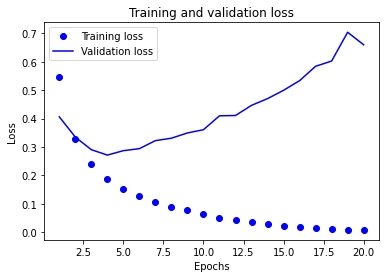

In [54]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [37]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model


In [40]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [39]:
#model2.compile()
model2_dr.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#model2.fit()
history_dr = model2_dr.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6076 - accuracy: 0.6746 - val_loss: 0.4652 - val_accuracy: 0.8489
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4567 - accuracy: 0.8071 - val_loss: 0.3997 - val_accuracy: 0.8406
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3752 - accuracy: 0.8550 - val_loss: 0.3107 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3090 - accuracy: 0.8856 - val_loss: 0.2837 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2621 - accuracy: 0.9084 - val_loss: 0.2797 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2267 - accuracy: 0.9224 - val_loss: 0.2837 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1996 - accuracy: 0.9301 - val_loss: 0.3077 - val_accuracy: 0.8889
Epoch 8/20
30

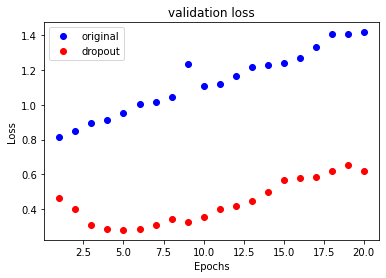

In [41]:
# visualize 

import matplotlib.pyplot as plt
history_dr_dict = history_dr.history
val_loss_values_dr = history_dr_dict["val_loss"]
history2_dict = history2.history
val_loss_values2 = history2_dict["val_loss"]
epochs = range(1, len(val_loss_values_dr) + 1)
plt.plot(epochs, val_loss_values2, "bo", label="original")
plt.plot(epochs, val_loss_values_dr, "bo", label="dropout", color = "red")
plt.title("validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [31]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [32]:
## Add l1 regularization on the second dense layers 
from tensorflow.keras import regularizers
model2_l1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

In [33]:
#model2.compile()
model2_l1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#model2.fit()
history_l1 = model2_l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6004 - accuracy: 0.7709 - val_loss: 0.4572 - val_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3750 - accuracy: 0.9015 - val_loss: 0.4091 - val_accuracy: 0.8703
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2937 - accuracy: 0.9299 - val_loss: 0.3539 - val_accuracy: 0.8931
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2472 - accuracy: 0.9427 - val_loss: 0.3494 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2074 - accuracy: 0.9575 - val_loss: 0.3526 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1852 - accuracy: 0.9628 - val_loss: 0.3653 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1606 - accuracy: 0.9713 - val_loss: 0.3755 - val_accuracy: 0.8847
Epoch 8/20
30

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

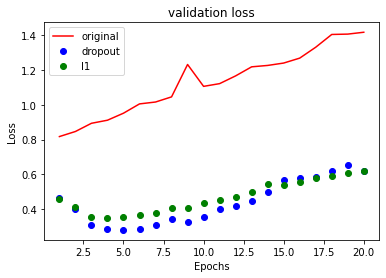

In [44]:
# visualize 
import matplotlib.pyplot as plt
history_dr_dict = history_dr.history
history_l1_dict = history_l1.history
history2_dict = history2.history
val_loss_values2 = history2_dict["val_loss"]
val_loss_values_dr = history_dr_dict["val_loss"]
val_loss_values_l1 = history_l1_dict["val_loss"]
epochs = range(1, len(val_loss_values2) + 1)
plt.plot(epochs, val_loss_values2, "b", label="original", color="red")
plt.plot(epochs, val_loss_values_dr, "bo", label="dropout")
plt.plot(epochs, val_loss_values_l1, "bo", label="l1", color = "green")
plt.title("validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()